In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()



In [31]:
# Return the minimum, average, and maximum temperatures of the range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tmin_tavg_tmax = calc_temps('2015-01-01', '2016-12-31')
print(tmin_tavg_tmax) 

[(56.0, 73.99894269401565, 86.0)]


In [32]:
# Loading reults into a DataFrame for easily access
data = tmin_tavg_tmax
data_df = pd.DataFrame(data, columns=['tmin', 'tavg', 'tmax'])
data_df

,tmin,tavg,tmax
0,56.0,73.998943,86.0


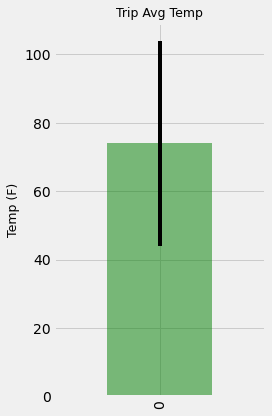

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tavg_temp = data_df['tavg']
tmin_tmax_temp = data_df.iloc[0]['tmax'] - data_df.iloc[0]['tmin']
tavg_temp.plot(kind='bar', yerr=tmin_tmax_temp, figsize=(4,6), alpha=0.5, color='g')
plt.title("Trip Avg Temp", fontsize=12.5)
plt.ylabel("Temp (F)", fontsize=12.5)
plt.tight_layout()
plt.show()